In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cosmic
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
from cosmic.sample.sampler import independent

## Start playing with the metallicity, duration, and the models

In [3]:
final_kstar1 = [10,11,12]
final_kstar2 = [10,11,12]

InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = \
     InitialBinaryTable.sampler('independent', final_kstar1, final_kstar2, binfrac_model=0.5,
                                primary_model='kroupa01', ecc_model='sana12', porb_model='sana12',
                                qmin=-1, SF_start=13700.0, SF_duration=0.0, met=0.02, size=100)

print(InitialBinaries)

     kstar_1  kstar_2    mass_1    mass_2          porb       ecc  \
0        1.0      1.0  1.373283  1.275558   2158.905335  0.313256   
1        1.0      0.0  0.713810  0.594644     22.099540  0.084319   
2        1.0      1.0  5.070099  4.326670      4.138183  0.883553   
3        1.0      1.0  0.983064  0.932620      5.107018  0.076339   
4        1.0      0.0  0.746180  0.642801   2106.816448  0.655607   
..       ...      ...       ...       ...           ...       ...   
104      1.0      0.0  4.507584  0.691443    100.985848  0.020170   
105      1.0      1.0  2.162924  1.555140      7.289567  0.004554   
106      1.0      1.0  1.182919  1.152964   2173.385789  0.104109   
107      0.0      0.0  0.579296  0.514940  55536.342934  0.329635   
108      1.0      1.0  2.099328  0.939053      7.684313  0.271625   

     metallicity   tphysf   mass0_1   mass0_2  ...  tacc_1  tacc_2  epoch_1  \
0           0.02  13700.0  1.373283  1.275558  ...     0.0     0.0      0.0   
1           0

In [129]:
print(list(InitialBinaries.columns))

['kstar_1', 'kstar_2', 'mass_1', 'mass_2', 'porb', 'ecc', 'metallicity', 'tphysf', 'mass0_1', 'mass0_2', 'rad_1', 'rad_2', 'lum_1', 'lum_2', 'massc_1', 'massc_2', 'radc_1', 'radc_2', 'menv_1', 'menv_2', 'renv_1', 'renv_2', 'omega_spin_1', 'omega_spin_2', 'B_1', 'B_2', 'bacc_1', 'bacc_2', 'tacc_1', 'tacc_2', 'epoch_1', 'epoch_2', 'tms_1', 'tms_2', 'bhspin_1', 'bhspin_2', 'tphys', 'binfrac']


In [110]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'dtp' : 13700.0}

bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

print(bcm.iloc[:10])

/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1         lum_1     rad_1        teff_1  \
0      0.0      1.0  1.373283  1.373283  2.849006e+00  1.359630   6460.000601   
0  13700.0     11.0  0.527276  0.536501  2.349973e-05  0.013673   3452.283715   
1      0.0      0.0  0.713810  0.713810  1.262551e-01  0.664623   4239.300401   
1  13700.0      0.0  0.713810  0.713810  1.627642e-01  0.704991   4385.988738   
2      0.0      1.0  5.070099  5.070099  5.488323e+02  2.800659  16768.698960   
2  13700.0     13.0  9.167143  1.277584  1.261200e-10  0.000014   5192.800263   
3      0.0      1.0  0.983064  0.983064  5.782324e-01  0.867483   5428.310662   
3  13700.0      3.0  0.982509  0.982507  2.122265e+00  2.487343   4437.124956   
4      0.0      1.0  0.746180  0.746180  1.539701e-01  0.691492   4367.521016   
4  13700.0      1.0  0.746180  0.746180  2.090040e-01  0.740758   4554.808026   

    massc_1    radc_1        menv_1        renv_1      epoch_1  omega_spin_1  \
0  0.000000  0.000000  1.000

In [119]:
print(type(bpp), type(bcm))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [122]:
bpp.head()

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
0,0.000000,1.373283,1.275558,1.0,1.0,972.283513,2158.905335,0.313256,0.005284,0.004989,1.0,0.000000,0.000000,3889.469349,4961.400435,0.000000,0.0,1.359630,1.240964,1.373283,1.275558,2.849006,2.022421,6460.000601,6206.659288,0.000000,0.0,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,3609.034590,2594.093975,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
0,3889.469738,1.373283,1.275558,2.0,1.0,972.283513,2158.905335,0.313256,0.008823,0.006469,2.0,3889.469738,3889.469738,3889.469349,4961.400435,0.143321,0.0,2.270097,1.609250,1.373283,1.275558,6.282840,3.067521,6092.371753,6048.598572,0.121180,0.0,2.296628e-08,2.103064e-06,1.941736e-02,3.093938e-02,1444.137617,1542.613654,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
0,4057.600869,1.372908,1.275558,3.0,1.0,972.421008,2159.516047,0.313256,0.013714,0.006562,2.0,4061.138748,4057.600489,3892.813247,4961.399963,0.163187,0.0,3.528698,1.632602,1.372908,1.275558,4.645369,3.099457,4531.243943,6020.753956,0.115517,0.0,6.048616e-01,4.423424e-06,2.218569e+00,4.027757e-02,454.800009,1498.800626,0.0,0.0,0.0,0.0,0.0,0.0,-3.537879,0.000379,0.0,0.0,0
0,4337.020402,1.255784,1.283476,4.0,1.0,888.074686,1924.831744,0.000632,0.048772,0.005007,2.0,5940.006211,4244.766750,5239.760586,4855.839366,0.473945,0.0,16.320067,1.692313,1.255784,1.283476,60.358679,3.220624,4000.309329,5970.548295,0.103875,0.0,6.443289e-01,1.265360e-05,1.545064e+01,5.990906e-02,199.938954,1993.317863,0.0,0.0,0.0,0.0,0.0,0.0,-1602.985809,92.253652,0.0,0.0,0
0,4471.612261,1.215808,1.283727,5.0,1.0,901.894563,1985.528756,0.000632,0.094388,0.004962,2.0,6074.598070,4376.418102,5239.760586,4852.553080,0.511750,0.0,31.836891,1.715814,1.255784,1.283727,172.441411,3.244932,3723.614205,5940.676710,0.113340,0.0,7.040587e-01,2.302313e-05,3.172355e+01,7.392422e-02,40.385605,1965.878621,0.0,0.0,0.0,0.0,0.0,0.0,-1602.985809,95.194159,0.0,0.0,0


In [130]:
bcm.head()

,tphys,kstar_1,mass0_1,mass_1,lum_1,rad_1,teff_1,massc_1,radc_1,menv_1,renv_1,epoch_1,omega_spin_1,deltam_1,RRLO_1,kstar_2,mass0_2,mass_2,lum_2,rad_2,teff_2,massc_2,radc_2,menv_2,renv_2,epoch_2,omega_spin_2,deltam_2,RRLO_2,porb,sep,ecc,B_1,B_2,SN_1,SN_2,bin_state,merger_type,bin_num
0,0.0,1.0,1.373283,1.373283,2.849006,1.359630,6460.000601,0.000000,0.000000,1.000000e-10,1.000000e-10,0.00000,3609.034590,0.0,0.005284,1.0,1.275558,1.275558,2.022421,1.240964,6206.659288,0.000000,0.00000,1.000000e-10,1.000000e-10,0.000000,2594.093975,0.0,0.004989,2158.905335,972.283513,0.313256,0.0,0.0,0.0,0.0,0,-001,0
0,13700.0,11.0,0.527276,0.536501,0.000023,0.013673,3452.283715,0.536501,0.013673,1.000000e-10,1.000000e-10,4476.05545,1.588320,0.0,0.001006,11.0,0.531959,0.531959,0.000029,0.013740,3625.177792,0.531959,0.01374,1.000000e-10,1.000000e-10,5106.193917,95.602840,0.0,0.001015,24.004204,35.787359,0.000000,0.0,0.0,0.0,0.0,0,-001,0
1,0.0,0.0,0.713810,0.713810,0.126255,0.664623,4239.300401,0.000000,0.000000,6.813246e-02,2.176316e-01,0.00000,65.087977,0.0,0.050733,0.0,0.594644,0.594644,0.061115,0.550817,3884.210149,0.000000,0.00000,9.892597e-02,1.950387e-01,0.000000,18.829514,0.0,0.045705,22.099540,36.234885,0.084319,0.0,0.0,0.0,0.0,0,-001,1
1,13700.0,0.0,0.713810,0.713810,0.162764,0.704991,4385.988738,0.000000,0.000000,6.818065e-02,2.309973e-01,0.00000,57.847443,0.0,0.053815,0.0,0.594644,0.594644,0.067602,0.568649,3920.464520,0.000000,0.00000,9.892627e-02,2.013536e-01,0.000000,17.667069,0.0,0.047185,22.099285,36.234606,0.084318,0.0,0.0,0.0,0.0,0,-001,1
2,0.0,1.0,5.070099,5.070099,548.832275,2.800659,16768.698960,0.000000,0.000000,1.000000e-10,1.000000e-10,0.00000,4590.314855,0.0,2.676488,1.0,4.326670,4.326670,307.166125,2.558618,15174.353161,0.000000,0.00000,1.000000e-10,1.000000e-10,0.000000,5120.244828,0.0,2.628884,4.138183,22.881502,0.883553,0.0,0.0,0.0,0.0,0,-001,2


In [124]:
print('Length of bpp', len(bpp))
Sel = bpp[bpp.ecc >= 0]
print('Length of selection:', len(Sel))

Length of bpp 1049
Length of selection: 794


In [125]:
print(len(bcm))

218


In [128]:
# What is in these data frames?
print(list(bcm.columns))
print(list(bpp.columns))

['tphys', 'kstar_1', 'mass0_1', 'mass_1', 'lum_1', 'rad_1', 'teff_1', 'massc_1', 'radc_1', 'menv_1', 'renv_1', 'epoch_1', 'omega_spin_1', 'deltam_1', 'RRLO_1', 'kstar_2', 'mass0_2', 'mass_2', 'lum_2', 'rad_2', 'teff_2', 'massc_2', 'radc_2', 'menv_2', 'renv_2', 'epoch_2', 'omega_spin_2', 'deltam_2', 'RRLO_2', 'porb', 'sep', 'ecc', 'B_1', 'B_2', 'SN_1', 'SN_2', 'bin_state', 'merger_type', 'bin_num']
['tphys', 'mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep', 'porb', 'ecc', 'RRLO_1', 'RRLO_2', 'evol_type', 'aj_1', 'aj_2', 'tms_1', 'tms_2', 'massc_1', 'massc_2', 'rad_1', 'rad_2', 'mass0_1', 'mass0_2', 'lum_1', 'lum_2', 'teff_1', 'teff_2', 'radc_1', 'radc_2', 'menv_1', 'menv_2', 'renv_1', 'renv_2', 'omega_spin_1', 'omega_spin_2', 'B_1', 'B_2', 'bacc_1', 'bacc_2', 'tacc_1', 'tacc_2', 'epoch_1', 'epoch_2', 'bhspin_1', 'bhspin_2', 'bin_num']


In [118]:
InitialBinaries.tail()

,kstar_1,kstar_2,mass_1,mass_2,porb,ecc,metallicity,tphysf,mass0_1,mass0_2,rad_1,rad_2,lum_1,lum_2,massc_1,massc_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,tms_1,tms_2,bhspin_1,bhspin_2,tphys,binfrac
104,1.0,0.0,4.507584,0.691443,100.985848,0.020170,0.02,13700.0,4.507584,0.691443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
105,1.0,1.0,2.162924,1.555140,7.289567,0.004554,0.02,13700.0,2.162924,1.555140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
106,1.0,1.0,1.182919,1.152964,2173.385789,0.104109,0.02,13700.0,1.182919,1.152964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
107,0.0,0.0,0.579296,0.514940,55536.342934,0.329635,0.02,13700.0,0.579296,0.514940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
108,1.0,1.0,2.099328,0.939053,7.684313,0.271625,0.02,13700.0,2.099328,0.939053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [5]:
#print(bpp)
#print(bcm)
mass1 = bcm.mass_1
m1 = np.array(mass1)
mass2 = bcm.mass_2
m2 = np.array(mass2)

In [6]:
tphys = bcm.tphys
Tphys = np.array(tphys)

In [7]:
final_mass1 = [m1[i] for i in range(len(Tphys)) if Tphys[i] == 13700.0]
#print(final_mass1)
final_mass2 = [m2[i] for i in range(len(Tphys)) if Tphys[i] == 13700.0]
#print(final_mass2)
f_m1 = pd.DataFrame(final_mass1)
f_m2 = pd.DataFrame(final_mass2)

(array([13.,  1.,  1.,  8., 39., 20., 14.,  5.,  1.,  7.]),
 array([0.        , 0.1317432 , 0.26348641, 0.39522961, 0.52697281,
        0.65871602, 0.79045922, 0.92220242, 1.05394563, 1.18568883,
        1.31743203]),
 <BarContainer object of 10 artists>)

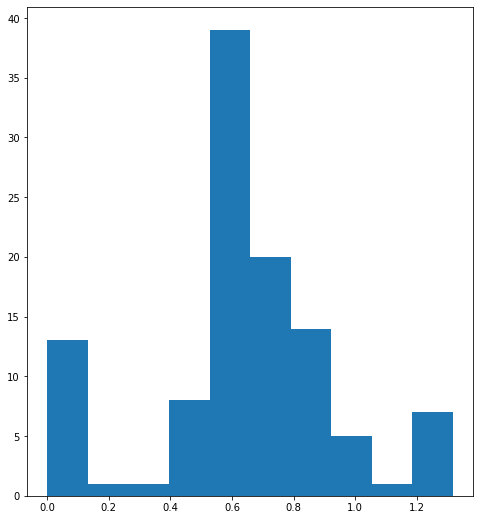

In [8]:
fig = plt.figure(figsize=(8,9))
ax1 = fig.add_subplot(1,1,1)
ax1.hist(final_mass1)

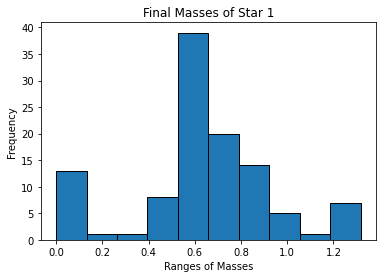

In [9]:
f_m1.plot(kind='hist', edgecolor='black', alpha=1, legend=None)
plt.title('Final Masses of Star 1')
plt.xlabel('Ranges of Masses')
plt.show()

Text(0.5, 0, 'Range of Masses')

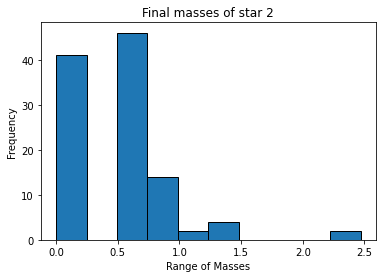

In [10]:
f_m2.plot(kind='hist', edgecolor='black', alpha=1, legend=None)
plt.title('Final masses of star 2')
plt.xlabel('Range of Masses')

In [100]:
#Getting rid of any binary systems with a period of infinity
fperiod = bcm.porb
fp = np.array(fperiod)
f_period = [fp[i] for i in range(len(Tphys)) if Tphys[i] == 13700.0]
f = [f_period[i] for i in range(len(f_period)) if f_period[i]!= np.Inf]
fp1 = pd.DataFrame(f)

Text(0.5, 0, 'Periods')

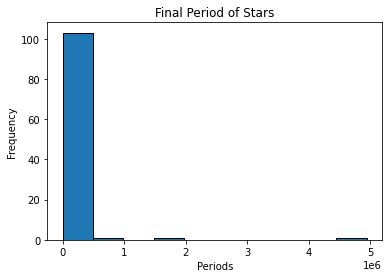

In [12]:
fp1.plot(kind='hist', edgecolor='black', legend=None)
plt.title('Final Period of Stars')
plt.xlabel('Periods')

# Change to 100,000 pop
# 

In [13]:
sin_i = np.random.uniform(0, 1, len(f_m1))
sin = np.array(sin_i)
sini = pd.DataFrame(sin)
print(sini)

            0
0    0.724753
1    0.690976
2    0.238228
3    0.450005
4    0.377711
..        ...
104  0.406146
105  0.793096
106  0.559710
107  0.617227
108  0.770680

[109 rows x 1 columns]


In [14]:
def rv_variable(m1, m2, a, period, ecc, sin_i):
    """
    Function to calculate readial velocity variability
    
    m1: Mass 1
    m2: Mass 2
    period: Period
    ecc: Eccentricity
    a: amplitude
    """
    var = (2*np.pi*a*m2*sin_i)/(period*(m1+m2)*(1-ecc**2)**(1/2))
    return var

<AxesSubplot:ylabel='Frequency'>

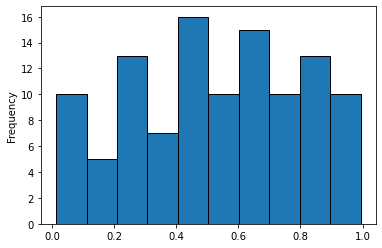

In [16]:
sini.plot(kind='hist', edgecolor='black', legend=None)

In [18]:
semi_major = bcm.sep
a = np.array(semi_major)
a = [a[i] for i in range(len(Tphys)) if Tphys[i] == 13700.0]
a = pd.DataFrame(a)
print(a)

               0
0      35.787359
1      36.234606
2       0.000000
3      15.131504
4     771.380255
..           ...
104     0.000000
105     0.000000
106  1000.329241
107  6310.160772
108     0.000000

[109 rows x 1 columns]


Text(0.5, 0, 'Semi-Major Lengths')

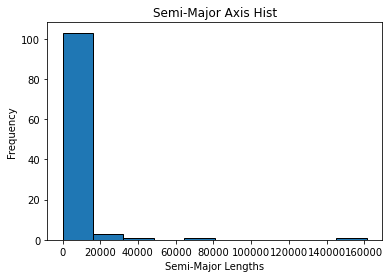

In [29]:
a.plot(kind='hist', edgecolor='black', legend=None)
plt.title('Semi-Major Axis Hist')
plt.xlabel('Semi-Major Lengths')

In [20]:
print(a)

               0
0      35.787359
1      36.234606
2       0.000000
3      15.131504
4     771.380255
..           ...
104     0.000000
105     0.000000
106  1000.329241
107  6310.160772
108     0.000000

[109 rows x 1 columns]


In [21]:
eccentricity = bcm.ecc
ecc = np.array(eccentricity)
ecc = [ecc[i] for i in range(len(Tphys)) if Tphys[i] == 13700.0]
ecc = pd.DataFrame(ecc)
print(ecc)

            0
0    0.000000
1    0.084318
2   -1.000000
3    0.000000
4    0.655607
..        ...
104 -1.000000
105 -1.000000
106  0.000000
107  0.329635
108 -1.000000

[109 rows x 1 columns]


In [22]:
rv=[]
rv = rv_variable(f_m1, f_m2, fp1, ecc, a, sini)
rv = np.array(rv)
rv = [rv[i] for i in range(len(rv)) if rv[i]!= np.Inf]
rv = pd.DataFrame(rv)
print(rv)

            0
0    7.010971
1    6.684219
2    2.304523
3    4.353163
4    3.653819
..        ...
104  3.928897
105  7.672095
106  5.414412
107  5.970802
108  7.455248

[109 rows x 1 columns]


rv.plot(kind='hist', edgecolor='black', legend=None)
plt.title('Radial Velocity Variability')
plt.xlabel('RV Variability')

In [101]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(fp1)

                0
0    2.400420e+01
1    2.209929e+01
2    0.000000e+00
3    4.929379e+00
4    2.106816e+03
5    6.854188e+00
6    0.000000e+00
7    3.553505e+00
8    2.137965e+02
9    0.000000e+00
10   0.000000e+00
11   0.000000e+00
12   2.911480e+03
13   0.000000e+00
14   6.675752e+00
15   1.333106e+01
16   0.000000e+00
17   3.218636e+03
18   0.000000e+00
19   3.464194e+00
20   3.896929e+01
21   3.428322e+01
22   0.000000e+00
23   0.000000e+00
24   2.001428e+04
25   4.943209e+06
26   4.204754e+02
27   3.293037e+03
28   2.934402e+01
29   6.435381e+04
30   9.402923e+04
31   0.000000e+00
32   0.000000e+00
33   0.000000e+00
34   2.570974e-01
35   9.103210e+00
36   0.000000e+00
37   9.222822e+03
38   0.000000e+00
39   8.844041e-03
40  -1.000000e+00
41   4.495135e+01
42   0.000000e+00
43   1.487092e+01
44   0.000000e+00
45   8.407579e-01
46   0.000000e+00
47   2.551006e+05
48   5.055513e+04
49   0.000000e+00
50   1.095312e+04
51   0.000000e+00
52   0.000000e+00
53   2.936701e+01
54   1.127

### Semi-major axis (a) has unwanted negative values

### Need to remove periods(0, -1),  semi-major axis(a, 0, -1), ecc(-1)
### Then check to see that all rv_vars are positive and non-zero

In [102]:
fp1 = pd.DataFrame(fp1)
x = np.where(fp1==0)
print(x)

(array([  2,   6,   9,  10,  11,  13,  16,  18,  22,  23,  31,  32,  33,
        36,  38,  42,  44,  46,  49,  51,  52,  57,  61,  63,  65,  70,
        71,  75,  78,  79,  87,  88,  89,  91,  92,  96,  97,  98,  99,
       101, 102, 105]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [107]:
fp1.head()

,0
0,24.004204
1,22.099285
2,0.000000
3,4.929379
4,2106.816446


In [108]:
y = np.where(a==0)[0]
z = np.where(ecc==-1)[0]
print(y)
print(z)

[  2   6   9  10  11  13  16  18  22  23  31  32  33  36  38  42  44  46
  50  52  53  58  62  64  66  71  72  76  80  81  89  90  91  93  94  99
 100 101 102 104 105 108]
[  2   6   9  10  11  13  16  18  22  23  31  32  33  36  38  39  40  42
  44  46  50  52  53  58  59  62  64  66  70  71  72  76  80  81  85  89
  90  91  93  94  99 100 101 102 104 105 108]


f = [f_period[i] for i in range(len(f_period)) if f_period[i] != 0.0 and f_period[i] != 'inf' and f_period[i] != -1]

print(f)

a = np.array(a)
ecc = np.array(ecc)
z = [a[i] for i in range(len(a)) if a[i] != 0 and a[i] != -1]
y = [ecc[i] for i in range(len(ecc)) if ecc[i] != -1]

print(y)

In [77]:
del_arr = [x[0][i] for i in range(len(x[0]))]

In [78]:
print(del_arr)

[2, 6, 9, 10, 11, 13, 16, 18, 22, 23, 31, 32, 33, 36, 38, 42, 44, 46, 49, 51, 52, 57, 61, 63, 65, 70, 71, 75, 78, 79, 87, 88, 89, 91, 92, 96, 97, 98, 99, 101, 102, 105]


In [104]:
for i in range(len(y[0])):
    for j in range(len(del_arr)):
        if y[0][i] != del_arr[j]:
            del_arr.append(y[0][i])
    
#for i in range(len(z[0])):
 #   if z[0][i] != 

KeyboardInterrupt: 

In [ ]:
print(del_arr)